In [1]:
!pip install pmdarima

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 날짜 데이터 생성
from datetime import datetime
# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# auto_arima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 맑은 고딕 적용
matplotlib.rc('font', family = 'NanumGothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus = False)

In [4]:
df = pd.read_csv("kurly.csv")
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


In [7]:
df['OrderDT'] = pd.to_datetime(df['OrderDT'])
df['YearMonthStr'] = df['OrderDT'].dt.strftime('%Y-%m')
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,YearMonthStr
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12


In [11]:
# 신선식품, 가공식품 데이터프레임 생성
df_fresh = df[df['ItemLargeName']=='신선식품']
df_processed = df[df['ItemLargeName']=='가공식품']

In [15]:
# 월별 매출액 시계열 자료로 변환
df_fresh_timeseries = df_fresh.groupby('YearMonthStr')['Price'].sum().reset_index()
df_processed_timeseries = df_processed.groupby('YearMonthStr')['Price'].sum().reset_index()

In [19]:
# 날짜를 인덱스로
df_fresh_timeseries = df_fresh_timeseries.set_index(keys='YearMonthStr')
df_processed_timeseries = df_processed_timeseries.set_index(keys='YearMonthStr')

In [25]:
df_fresh_timeseries

,Price
YearMonthStr,
2021-01,176181030
2021-02,166229970
2021-03,190851570
2021-04,197392360
2021-05,203602130
2021-06,184343410
2021-07,188155990
2021-08,190593140
2021-09,181260080


In [20]:
# 신선식품 auto_arima
ts_model = auto_arima(df_fresh_timeseries, max_p=3, max_q=3, d=2, 
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1277.352, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1296.878, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1275.134, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1273.140, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1273.138, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1275.992, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1274.123, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1272.668, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1272.950, Time=0.07 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1276.570, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1275.083, Time=0.06 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.676 seconds


In [21]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(2)인 ARIMA 모델
ts_model_fresh = ARIMA(df_fresh_timeseries, order = (0, 2, 2), seasonal_order=(0, 0, 0, 0))  # (p,d,q) 지정

# 데이터 적합
ts_result_fresh = ts_model_fresh.fit()
print(ts_result_fresh.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   36
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -633.334
Date:                Wed, 20 Mar 2024   AIC                           1272.668
Time:                        01:34:51   BIC                           1277.247
Sample:                    01-01-2021   HQIC                          1274.230
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8858      0.155     -5.712      0.000      -1.190      -0.582
ma.L2          0.3603      0.213      1.693      0.091      -0.057       0.778
sigma2      1.136e+15   3.51e-17   3.23e+31      0.0

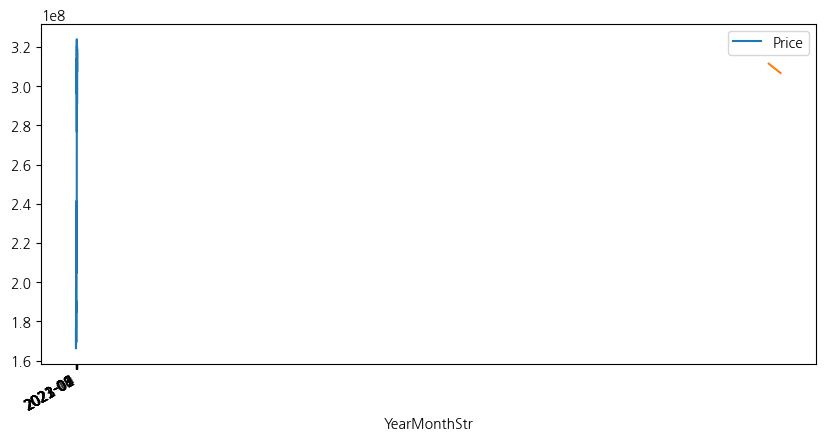

In [34]:
# 예측 시작/종료 날짜 지정
# start_time = df_model_fresh.index.min() # 2016-03-23
# end_time = df_model_fresh.index.max() # 2016-03-31

fig, ax = plt.subplots(figsize = (10, 5))

# 예측 전까지 데이터
ax = df_fresh_timeseries.plot(ax = ax)

# 예측 그래프 생성 함수, start: 예측 시작, end: 예측 종료, plot_insample: 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_fresh.predict(start="2024-1", end="2024-12", ax = ax, plot_insample=False).plot()

In [30]:
ts_result_fresh.predict(start="2024-1", end="2024-12", ax = ax, plot_insample=False)

2024-01-01    3.115568e+08
2024-02-01    3.111233e+08
2024-03-01    3.106899e+08
2024-04-01    3.102564e+08
2024-05-01    3.098229e+08
2024-06-01    3.093895e+08
2024-07-01    3.089560e+08
2024-08-01    3.085226e+08
2024-09-01    3.080891e+08
2024-10-01    3.076556e+08
2024-11-01    3.072222e+08
2024-12-01    3.067887e+08
Freq: MS, Name: predicted_mean, dtype: float64